In [1]:
import os
!{sys.executable} -m pip install tensorflow pandas numpy sklearn imread resize 
import tensorflow as tf
import sys
!{sys.executable} -m pip install pandas numpy sklearn imread #  resize
print (tf.__version__)
from platform import python_version

print(python_version())


/bin/bash: {sys.executable}: command not found
  Using cached pandas-1.3.3-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (11.5 MB)
  Using cached sklearn-0.0-py2.py3-none-any.whl
  Using cached resize-0.1.0-py3-none-any.whl
  Using cached docopt-0.6.2-py2.py3-none-any.whl
  Using cached Pillow-5.3.0.tar.gz (15.6 MB)
  Preparing metadata (setup.py) ... done
  ERROR: Command errored out with exit status 1:
   command: /home/jordi/TFM/TFM/bin/python -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'/tmp/pip-install-_6t95z8g/pillow_55215047a64444b6b69b771430414cc0/setup.py'"'"'; __file__='"'"'/tmp/pip-install-_6t95z8g/pillow_55215047a64444b6b69b771430414cc0/setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d /tmp/pip-wheel-l93j0f

Failed to build Pillow
  Attempting uninstall: Pillow
    Found existing installation: Pillow 8.4.0
    Uninstalling Pillow-8.4.0:
      Successfully uninstalled Pillow-8.4.0
    Running setup.py install for Pillow ... error
    ERROR: Command errored out with exit status 1:
     command: /home/jordi/TFM/TFM/bin/python -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'/tmp/pip-install-_6t95z8g/pillow_55215047a64444b6b69b771430414cc0/setup.py'"'"'; __file__='"'"'/tmp/pip-install-_6t95z8g/pillow_55215047a64444b6b69b771430414cc0/setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' install --record /tmp/pip-record-75_a5c3y/install-record.txt --single-version-externally-managed --compile --install-headers /home/jordi/TFM/TFM/include/site/python3.8/Pillow
  

2.6.0
3.8.10


In [4]:
# Obtenemos lista de nombres de ficheros de secuencias ya pasadas letras a numérico borra ficheros vacíos
!pip install pandas

import pandas as pd
import numpy as np
import os
import shutil

pathDataset = os.path.join("./dataset")
pathTestDataset = os.path.join("./testDataset")
nombresDeFicheros = os.walk(pathDataset)

indicesZero=list()
pathConAlu = os.path.join(pathDataset,"ConAlu")
pathSinAlu = os.path.join(pathDataset,"SinAlu")

FicherosEnConAlu = os.listdir(pathConAlu)
# eliminamos ficheros vacíos
for fichero in FicherosEnConAlu:
    
    if 'No' in fichero:
 #       print(fichero)
        shutil.move(pathConAlu+'/'+fichero,pathSinAlu+'/'+fichero )
        

  Using cached pandas-1.3.3-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (11.5 MB)


## Crear Secuencias de Test 

Serán las secuencias de los cromosomas 16 al 19. Estos Cromosomas suponen un ~10% de las bases totales del genoma humano.

In [43]:
pathTestDataset = os.path.join("./testDataset")
pathTestConAlu = os.path.join(pathTestDataset,"ConAlu")
pathTestSinAlu = os.path.join(pathTestDataset,"SinAlu")

FicherosEnConAlu = os.listdir(pathConAlu)
FicherosEnSinAlu = os.listdir(pathSinAlu)
print(len(FicherosEnConAlu))  
print(len(FicherosEnSinAlu))  

for nombre in FicherosEnConAlu:
    if  ('chr16' in nombre) or ('chr17' in nombre) or ('chr18' in nombre) or ('chr19' in nombre):
        shutil.move(pathConAlu+'/'+nombre,pathTestConAlu+'/'+nombre)

for nombre in FicherosEnSinAlu:

    if  ('chr16' in nombre) or ('chr17' in nombre) or ('chr18' in nombre) or ('chr19' in nombre):
           shutil.move(pathSinAlu+'/'+nombre,pathTestSinAlu+'/'+nombre )    
            
FicherosTestEnConAlu = os.listdir(pathTestConAlu)
FicherosTestEnSinAlu = os.listdir(pathTestSinAlu)
print(len(FicherosTestEnConAlu))  
print(len(FicherosTestEnSinAlu))  
            


1762542
905897
286602
112004


# https://www.tensorflow.org/tutorials/load_data/images


In [64]:
from tensorflow.keras.preprocessing import image_dataset_from_directory
import pathlib
cantidadDeImagenesAProcesar = 0.8
lote = 128
dimensiones_imagenes= (40,40)
semilla=42
pathDataset=os.path.join("dataset")
#c pathTrain="file://"+pathTrain
# pathTrain = pathlib.Path("./Train/")
# pathTrain = pathlib.Path('./Train/')
Train = image_dataset_from_directory(pathDataset,validation_split=0.1,
                                                 color_mode="grayscale", batch_size=lote, subset = "training", 
                                                 image_size=dimensiones_imagenes, seed = semilla)


classes = Train.class_names
print(classes)

Val = image_dataset_from_directory(pathDataset,validation_split=0.1,
                                                 color_mode="grayscale", batch_size=lote, subset = "validation", 
                                                 image_size=dimensiones_imagenes, seed = semilla) 
print(classes)

Found 2269833 files belonging to 2 classes.
Using 2042850 files for training.
['ConAlu', 'SinAlu']
Found 2269833 files belonging to 2 classes.
Using 226983 files for validation.


In [65]:
pathTestDataset = os.path.join("./testDataset")

Test = image_dataset_from_directory(pathTestDataset,validation_split=0.0,
                                                 color_mode="grayscale", batch_size=lote,  
                                                 image_size=dimensiones_imagenes, seed = semilla)

print(classes)

Found 398606 files belonging to 2 classes.
['ConAlu', 'SinAlu']


In [66]:
!pip install tensorflow-gpu

In [67]:
import tensorflow as tf
#tf.test.is_built_with_cuda()
#tf.test.is_gpu_available(cuda_only=False, min_cuda_compute_capability=None)
#tf.config.list_physical_devices('GPU')
#os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'

In [68]:
for image_batch, labels_batch in Train:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

(128, 40, 40, 1)
(128,)


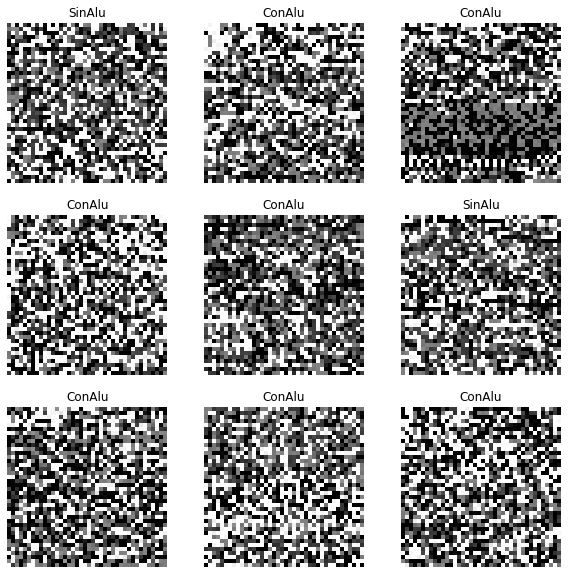

In [69]:
!pip install matplotlib
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in Train.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"),cmap='gray', vmin=0, vmax=255)
        plt.title(classes[labels[i]])
        plt.axis("off")


In [70]:
import numpy as np
import pandas as pd

#from skimage.io import imread
import imread
# from skimage.transform import resize
#!pip install resize

# import resize
import tensorflow as tf
# from tensorflow import keras
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
gpus = tf.config.list_physical_devices('GPU')
if gpus:
  try:
    # Currently, memory growth needs to be the same across GPUs
    for gpu in gpus:
      tf.config.experimental.set_memory_growth(gpu, True)
    logical_gpus = tf.config.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Memory growth must be set before GPUs have been initialized
    print(e)
print(tf.test.gpu_device_name())
print("?")
#config = tf.compat.v1.ConfigProto() 
#config.gpu_options.per_process_gpu_memory_fraction = 0.9
#tf.keras.backend.tensorflow_backend.set_session(tf.Session(config=config))
#gpu_devices = tf.config.experimental.list_physical_devices('GPU')
#for device in gpu_devices:
#    tf.config.experimental.set_memory_growth(device, True)


from keras.models import Sequential, Model, load_model
from keras.layers import Input, Conv1D, Conv2D, MaxPooling1D, MaxPooling2D, Dense, Dropout, Activation, Flatten,  Rescaling
from keras.layers import BatchNormalization
from tensorflow.keras.utils import to_categorical

Num GPUs Available:  1
Physical devices cannot be modified after being initialized
/device:GPU:0
?


2021-10-18 09:00:17.803363: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-18 09:00:17.804216: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-18 09:00:17.804349: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-18 09:00:17.807936: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-18 09:00:17.808086: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from S

In [72]:
import tensorflow as tf
tf.test.gpu_device_name()

2021-10-18 09:00:42.292189: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-18 09:00:42.292725: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-18 09:00:42.293102: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-18 09:00:42.293541: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-18 09:00:42.293930: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from S

'/device:GPU:0'

In [73]:
Train= Train.prefetch(buffer_size=64)
Val= Val.prefetch(buffer_size=64)

In [74]:
model = Sequential()
model.add(Rescaling(1./255,input_shape=(40,40,1)))
model.add(Conv2D(filters = 64, kernel_size = (2,2), activation ='relu',input_shape=(40,40,1)))
model.add(BatchNormalization(axis=3))
model.add(Conv2D(filters = 64, kernel_size = (2,2), activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization(axis=3 ))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 128, kernel_size = (2,2), activation ='relu'))
model.add(BatchNormalization(axis=3))
model.add(Conv2D(filters = 128, kernel_size = (2,2), activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization(axis=3))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 256, kernel_size = (2,2), activation ='relu'))
model.add(BatchNormalization(axis=3))
model.add(Conv2D(filters = 256, kernel_size = (2,2), activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization(axis=3))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(256, activation = "relu")) #Fully connected layer
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(60, activation = "relu")) #Fully connected layer
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(1, activation = "sigmoid")) #Classification layer or output layer

model.compile(optimizer="adam", loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_2 (Rescaling)      (None, 40, 40, 1)         0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 39, 39, 64)        320       
_________________________________________________________________
batch_normalization_16 (Batc (None, 39, 39, 64)        256       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 38, 38, 64)        16448     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 19, 19, 64)        0         
_________________________________________________________________
batch_normalization_17 (Batc (None, 19, 19, 64)        256       
_________________________________________________________________
dropout_10 (Dropout)         (None, 19, 19, 64)       

In [75]:
epocas=200


In [76]:
evolucionEntrenammiento = model.fit(Train, validation_data = Val, epochs= epocas)

Epoch 1/200
15960/15960 [==============================] - 414s 26ms/step - loss: 0.3569 - accuracy: 0.8358 - val_loss: 0.3005 - val_accuracy: 0.8653
Epoch 2/200
15960/15960 [==============================] - 413s 26ms/step - loss: 0.3095 - accuracy: 0.8631 - val_loss: 0.2851 - val_accuracy: 0.8736
Epoch 3/200
15960/15960 [==============================] - 413s 26ms/step - loss: 0.2961 - accuracy: 0.8697 - val_loss: 0.2769 - val_accuracy: 0.8772
Epoch 4/200
15960/15960 [==============================] - 401s 25ms/step - loss: 0.2877 - accuracy: 0.8742 - val_loss: 0.2663 - val_accuracy: 0.8832
Epoch 5/200
15960/15960 [==============================] - 403s 25ms/step - loss: 0.2802 - accuracy: 0.8781 - val_loss: 0.2587 - val_accuracy: 0.8864
Epoch 6/200
15960/15960 [==============================] - 409s 26ms/step - loss: 0.2740 - accuracy: 0.8811 - val_loss: 0.2538 - val_accuracy: 0.8886
Epoch 7/200
15960/15960 [==============================] - 406s 25ms/step - loss: 0.2680 - accuracy:

15960/15960 [==============================] - 395s 25ms/step - loss: 0.1854 - accuracy: 0.9224 - val_loss: 0.1358 - val_accuracy: 0.9475
Epoch 56/200
15960/15960 [==============================] - 395s 25ms/step - loss: 0.1848 - accuracy: 0.9226 - val_loss: 0.1372 - val_accuracy: 0.9476
Epoch 57/200
15960/15960 [==============================] - 395s 25ms/step - loss: 0.1844 - accuracy: 0.9229 - val_loss: 0.1371 - val_accuracy: 0.9479
Epoch 58/200
15960/15960 [==============================] - 395s 25ms/step - loss: 0.1838 - accuracy: 0.9230 - val_loss: 0.1356 - val_accuracy: 0.9484
Epoch 59/200
15960/15960 [==============================] - 401s 25ms/step - loss: 0.1832 - accuracy: 0.9234 - val_loss: 0.1330 - val_accuracy: 0.9491
Epoch 60/200
15960/15960 [==============================] - 399s 25ms/step - loss: 0.1827 - accuracy: 0.9237 - val_loss: 0.1329 - val_accuracy: 0.9497
Epoch 61/200
15960/15960 [==============================] - 395s 25ms/step - loss: 0.1825 - accuracy: 0.923

15960/15960 [==============================] - 394s 25ms/step - loss: 0.1652 - accuracy: 0.9317 - val_loss: 0.1049 - val_accuracy: 0.9639
Epoch 110/200
15960/15960 [==============================] - 395s 25ms/step - loss: 0.1649 - accuracy: 0.9320 - val_loss: 0.1035 - val_accuracy: 0.9654
Epoch 111/200
15960/15960 [==============================] - 395s 25ms/step - loss: 0.1647 - accuracy: 0.9320 - val_loss: 0.1051 - val_accuracy: 0.9648
Epoch 112/200
15960/15960 [==============================] - 395s 25ms/step - loss: 0.1647 - accuracy: 0.9321 - val_loss: 0.1027 - val_accuracy: 0.9653
Epoch 113/200
15960/15960 [==============================] - 395s 25ms/step - loss: 0.1642 - accuracy: 0.9323 - val_loss: 0.1026 - val_accuracy: 0.9643
Epoch 114/200
15960/15960 [==============================] - 394s 25ms/step - loss: 0.1636 - accuracy: 0.9326 - val_loss: 0.1059 - val_accuracy: 0.9644
Epoch 115/200
15960/15960 [==============================] - 395s 25ms/step - loss: 0.1640 - accuracy:

Epoch 163/200
15960/15960 [==============================] - 395s 25ms/step - loss: 0.1551 - accuracy: 0.9365 - val_loss: 0.0890 - val_accuracy: 0.9725
Epoch 164/200
15960/15960 [==============================] - 395s 25ms/step - loss: 0.1555 - accuracy: 0.9363 - val_loss: 0.0871 - val_accuracy: 0.9734
Epoch 165/200
15960/15960 [==============================] - 395s 25ms/step - loss: 0.1552 - accuracy: 0.9364 - val_loss: 0.0881 - val_accuracy: 0.9725
Epoch 166/200
15960/15960 [==============================] - 395s 25ms/step - loss: 0.1551 - accuracy: 0.9363 - val_loss: 0.0914 - val_accuracy: 0.9718
Epoch 167/200
15960/15960 [==============================] - 395s 25ms/step - loss: 0.1550 - accuracy: 0.9364 - val_loss: 0.0883 - val_accuracy: 0.9734
Epoch 168/200
15960/15960 [==============================] - 395s 25ms/step - loss: 0.1549 - accuracy: 0.9366 - val_loss: 0.0868 - val_accuracy: 0.9740
Epoch 169/200
15960/15960 [==============================] - 395s 25ms/step - loss: 0.15

In [77]:
model.save("20211020")

INFO:tensorflow:Assets written to: 20211019/assets


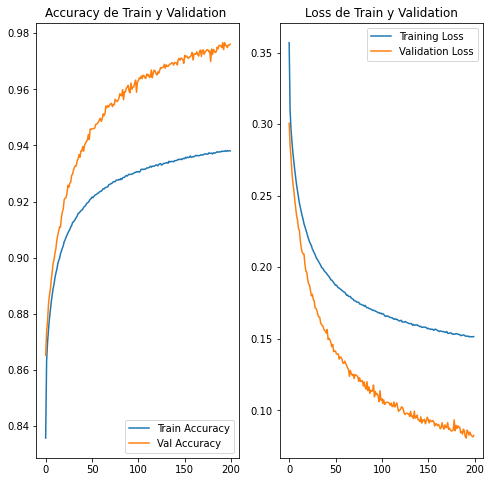

In [78]:
acc = evolucionEntrenammiento.history['accuracy']
val_acc = evolucionEntrenammiento.history['val_accuracy']

loss = evolucionEntrenammiento.history['loss']
val_loss = evolucionEntrenammiento.history['val_loss']

epochs_range = range(epocas)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Accuracy')
plt.plot(epochs_range, val_acc, label='Val Accuracy')
plt.legend(loc='lower right')
plt.title('Accuracy de Train y Validation ')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Loss de Train y Validation')
plt.show()


In [79]:
from keras.models import Sequential, Model, load_model # , evaluate, predict
score = model.evaluate(Test)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')


3115/3115 [==============================] - 21s 7ms/step - loss: 0.2946 - accuracy: 0.8956
Test loss: 0.2946218252182007 / Test accuracy: 0.8956337571144104


In [80]:
score=model.predict(Test)


In [82]:
print(score)
display(score)

[[1.1964502e-06]
 [9.9986196e-01]
 [5.4107752e-02]
 ...
 [1.2094378e-05]
 [9.2243862e-01]
 [3.7234611e-05]]


array([[1.1964502e-06],
       [9.9986196e-01],
       [5.4107752e-02],
       ...,
       [1.2094378e-05],
       [9.2243862e-01],
       [3.7234611e-05]], dtype=float32)

In [83]:
evolucionEntrenammiento_Plus50 = model.fit(Train, validation_data = Val, epochs= 50)

Epoch 1/50
15960/15960 [==============================] - 413s 26ms/step - loss: 0.1511 - accuracy: 0.9382 - val_loss: 0.0823 - val_accuracy: 0.9751
Epoch 2/50
15960/15960 [==============================] - 409s 26ms/step - loss: 0.1509 - accuracy: 0.9383 - val_loss: 0.0844 - val_accuracy: 0.9757
Epoch 3/50
15960/15960 [==============================] - 396s 25ms/step - loss: 0.1504 - accuracy: 0.9384 - val_loss: 0.0836 - val_accuracy: 0.9755
Epoch 4/50
15960/15960 [==============================] - 395s 25ms/step - loss: 0.1510 - accuracy: 0.9382 - val_loss: 0.0821 - val_accuracy: 0.9761
Epoch 5/50
15960/15960 [==============================] - 395s 25ms/step - loss: 0.1506 - accuracy: 0.9386 - val_loss: 0.0789 - val_accuracy: 0.9760
Epoch 6/50
15960/15960 [==============================] - 395s 25ms/step - loss: 0.1505 - accuracy: 0.9383 - val_loss: 0.0823 - val_accuracy: 0.9771
Epoch 7/50
15960/15960 [==============================] - 395s 25ms/step - loss: 0.1507 - accuracy: 0.9384

In [85]:
evolucionEntrenammiento_Plus100 = model.fit(Train, validation_data = Val, epochs= 50)

Epoch 1/50
15960/15960 [==============================] - 408s 26ms/step - loss: 0.1467 - accuracy: 0.9402 - val_loss: 0.0774 - val_accuracy: 0.9783
Epoch 2/50
15960/15960 [==============================] - 396s 25ms/step - loss: 0.1465 - accuracy: 0.9405 - val_loss: 0.0749 - val_accuracy: 0.9801
Epoch 3/50
15960/15960 [==============================] - 395s 25ms/step - loss: 0.1462 - accuracy: 0.9405 - val_loss: 0.0776 - val_accuracy: 0.9794
Epoch 4/50
15960/15960 [==============================] - 395s 25ms/step - loss: 0.1464 - accuracy: 0.9406 - val_loss: 0.0750 - val_accuracy: 0.9792
Epoch 5/50
15960/15960 [==============================] - 395s 25ms/step - loss: 0.1464 - accuracy: 0.9403 - val_loss: 0.0748 - val_accuracy: 0.9794
Epoch 6/50
15960/15960 [==============================] - 403s 25ms/step - loss: 0.1458 - accuracy: 0.9408 - val_loss: 0.0742 - val_accuracy: 0.9795
Epoch 7/50
15960/15960 [==============================] - 398s 25ms/step - loss: 0.1456 - accuracy: 0.9408

In [86]:
evolucionEntrenammiento_Plus150 = model.fit(Train, validation_data = Val, epochs= 50)

Epoch 1/50
15960/15960 [==============================] - 408s 26ms/step - loss: 0.1431 - accuracy: 0.9420 - val_loss: 0.0708 - val_accuracy: 0.9807
Epoch 2/50
15960/15960 [==============================] - 398s 25ms/step - loss: 0.1425 - accuracy: 0.9422 - val_loss: 0.0713 - val_accuracy: 0.9816
Epoch 3/50
15960/15960 [==============================] - 396s 25ms/step - loss: 0.1424 - accuracy: 0.9421 - val_loss: 0.0718 - val_accuracy: 0.9809
Epoch 4/50
15960/15960 [==============================] - 398s 25ms/step - loss: 0.1426 - accuracy: 0.9422 - val_loss: 0.0684 - val_accuracy: 0.9822
Epoch 5/50
15960/15960 [==============================] - 397s 25ms/step - loss: 0.1424 - accuracy: 0.9424 - val_loss: 0.0696 - val_accuracy: 0.9818
Epoch 6/50
15960/15960 [==============================] - 396s 25ms/step - loss: 0.1425 - accuracy: 0.9422 - val_loss: 0.0698 - val_accuracy: 0.9807
Epoch 7/50
15960/15960 [==============================] - 396s 25ms/step - loss: 0.1425 - accuracy: 0.9420

In [87]:
evolucionEntrenammiento_Plus200 = model.fit(Train, validation_data = Val, epochs= 50)

Epoch 1/50
15960/15960 [==============================] - 411s 26ms/step - loss: 0.1403 - accuracy: 0.9432 - val_loss: 0.0698 - val_accuracy: 0.9822
Epoch 2/50
15960/15960 [==============================] - 412s 26ms/step - loss: 0.1399 - accuracy: 0.9433 - val_loss: 0.0692 - val_accuracy: 0.9818
Epoch 3/50
15960/15960 [==============================] - 410s 26ms/step - loss: 0.1397 - accuracy: 0.9434 - val_loss: 0.0663 - val_accuracy: 0.9832
Epoch 4/50
15960/15960 [==============================] - 398s 25ms/step - loss: 0.1403 - accuracy: 0.9434 - val_loss: 0.0679 - val_accuracy: 0.9832
Epoch 5/50
15960/15960 [==============================] - 404s 25ms/step - loss: 0.1397 - accuracy: 0.9435 - val_loss: 0.0640 - val_accuracy: 0.9839
Epoch 6/50
15960/15960 [==============================] - 395s 25ms/step - loss: 0.1407 - accuracy: 0.9430 - val_loss: 0.0694 - val_accuracy: 0.9823
Epoch 7/50
15960/15960 [==============================] - 395s 25ms/step - loss: 0.1400 - accuracy: 0.9433

In [88]:
evolucionEntrenammiento_Plus250 = model.fit(Train, validation_data = Val, epochs= 50)

Epoch 1/50
15960/15960 [==============================] - 408s 26ms/step - loss: 0.1380 - accuracy: 0.9442 - val_loss: 0.0662 - val_accuracy: 0.9831
Epoch 2/50
15960/15960 [==============================] - 396s 25ms/step - loss: 0.1378 - accuracy: 0.9443 - val_loss: 0.0639 - val_accuracy: 0.9842
Epoch 3/50
15960/15960 [==============================] - 395s 25ms/step - loss: 0.1374 - accuracy: 0.9443 - val_loss: 0.0656 - val_accuracy: 0.9842
Epoch 4/50
15960/15960 [==============================] - 396s 25ms/step - loss: 0.1378 - accuracy: 0.9445 - val_loss: 0.0642 - val_accuracy: 0.9852
Epoch 5/50
15960/15960 [==============================] - 396s 25ms/step - loss: 0.1373 - accuracy: 0.9447 - val_loss: 0.0654 - val_accuracy: 0.9837
Epoch 6/50
15960/15960 [==============================] - 396s 25ms/step - loss: 0.1376 - accuracy: 0.9445 - val_loss: 0.0627 - val_accuracy: 0.9845
Epoch 7/50
15960/15960 [==============================] - 395s 25ms/step - loss: 0.1371 - accuracy: 0.9446

In [90]:
score = model.evaluate(Test,batch_size=128)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

3115/3115 [==============================] - 21s 7ms/step - loss: 0.3052 - accuracy: 0.8943
Test loss: 0.3051547408103943 / Test accuracy: 0.894286572933197


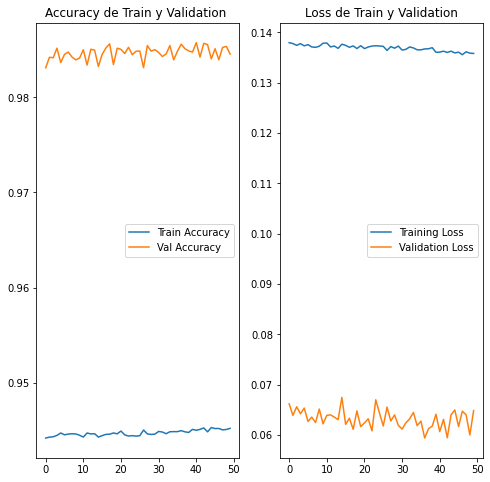

In [96]:
acc = evolucionEntrenammiento_Plus250.history['accuracy']
val_acc = evolucionEntrenammiento_Plus250.history['val_accuracy']

loss = evolucionEntrenammiento_Plus250.history['loss']
val_loss = evolucionEntrenammiento_Plus250.history['val_loss']

epochs_range = range(50)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Accuracy')
plt.plot(epochs_range, val_acc, label='Val Accuracy')
plt.legend(loc='center right')
plt.title('Accuracy de Train y Validation ')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='center right')
plt.title('Loss de Train y Validation')
plt.show()
